In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [3]:
from google.colab import files
files.upload()

Saving PersonalData.csv to PersonalData.csv


{'PersonalData.csv': b',Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Pi\xc4\x99tro,Dzieci,Odleglosc (km),Ubezp.\nA,190,88,3,3.5,7,6,1,25,Tak\nB,172,70,12,4.3,5,1,4,12,Nie\n'}

In [7]:
df = pd.read_csv("PersonalData.csv")
A = df.iloc[0]
B = df.iloc[1]
num_cols = df.select_dtypes(include=np.number).columns
A_num = A[num_cols]
B_num = B[num_cols]

A_num, B_num

euclidean_distance = np.sqrt(np.sum((A_num - B_num) ** 2))

A_scaled = A_num.copy()
B_scaled = B_num.copy()

A_scaled["Zarobki (tys.)"] *= 1000
B_scaled["Zarobki (tys.)"] *= 1000
euclidean_scaled = np.sqrt(np.sum((A_scaled - B_scaled) ** 2))

std = df[num_cols].std()

A_std = A_num / std
B_std = B_num / std
euclidean_standardized = np.sqrt(np.sum((A_std - B_std) ** 2))
p = 3
minkowski_distance = np.sum(np.abs(A_num - B_num) ** p) ** (1 / p)
manhattan_distance = np.sum(np.abs(A_num - B_num))
results = pd.DataFrame({
    "Miara": [
        "Euklidesowa",
        "Euklidesowa (zmiana skali)",
        "Euklidesowa (standaryzacja)",
        "Minkowskiego (p=3)",
        "Manhattan"
    ],
    "Wartość": [
        euclidean_distance,
        euclidean_scaled,
        euclidean_standardized,
        minkowski_distance,
        manhattan_distance
    ]
})

results


,Miara,Wartość
0,Euklidesowa,30.604575
1,Euklidesowa (zmiana skali),800.584786
2,Euklidesowa (standaryzacja),4.000000
3,Minkowskiego (p=3),24.524624
4,Manhattan,68.800000


## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [13]:
x = "abcde"
y = "bcdxye"
print(get_D_x_y(x, y)) # Oczekiwany wynik 3

X = "AGGTAB"
Y = "GXTXAYB"
print(get_D_x_y(X, Y)) # Oczekiwany wynik 5

3
5


In [12]:
def lcs_length(x: str, y: str) -> int:

    m, n = len(x), len(y)

    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[m][n]
def get_D_x_y(x: str, y: str) -> int:
    lcs_len = lcs_length(x, y)
    return len(x) + len(y) - 2 * lcs_len

x = "abcde"
y = "bcdxye"
print(get_D_x_y(x, y))

X = "AGGTAB"
Y = "GXTXAYB"
print(get_D_x_y(X, Y))


3
5


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Opisy filmów
film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta księżyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"

documents = [film1, film2, film3]
# CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
# Macierz cech
df_vectors = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=["film1", "film2", "film3"]
)

print(df_vectors)

cosine_sim = cosine_similarity(X)
cosine_df = pd.DataFrame(
    cosine_sim,
    index=["film1", "film2", "film3"],
    columns=["film1", "film2", "film3"]
)

print(cosine_df)


film4 = "rakieta mars astronauta czerwona planeta"

documents_extended = [film1, film2, film3, film4]
X_ext = vectorizer.fit_transform(documents_extended)
cosine_sim_ext = cosine_similarity(X_ext)
cosine_df_ext = pd.DataFrame(
    cosine_sim_ext,
    index=["film1", "film2", "film3", "film4"],
    columns=["film1", "film2", "film3", "film4"]
)
cosine_df_ext
(cosine_df_ext.loc["film4"].drop("film4").sort_values(ascending=False))




       astronauta  kosmiczna  krew  księżyc  misja  mroczny  noc  obca  \
film1           1          1     0        0      0        0    0     1   
film2           1          1     0        1      1        0    0     0   
film3           0          0     1        0      0        1    1     0   

       planeta  rakieta  stacja  wampir  zamek  
film1        1        0       1       0      0  
film2        0        1       0       0      0  
film3        0        0       0       1      1  
       film1  film2  film3
film1    1.0    0.4    0.0
film2    0.4    1.0    0.0
film3    0.0    0.0    1.0


,film4
film1,0.4
film2,0.4
film3,0.0


## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

In [29]:
from google.colab import files
files.upload()

Saving k_means_data.csv to k_means_data.csv


{'k_means_data.csv': b'# X1,X2\n2.131414777055050003e+00,1.138857278004757889e+00\n2.161723206785129747e+00,6.565950982129797886e-01\n1.062696221243021766e+00,5.176351431626175170e+00\n1.807096132977029423e+00,4.491907730734822080e-01\n2.269087359737519183e+00,1.321607560853105712e+00\n-1.825723483637288425e+00,4.075601493623314475e+00\n2.738907932158858305e+00,1.567681677257453110e-01\n-1.180949523252940780e+00,2.792903007986325736e+00\n-1.585975527877164781e+00,2.519795289515858183e+00\n2.061567533865370283e+00,1.969185956281437999e+00\n-1.289299985624918321e+00,2.262045356094819493e+00\n-1.988853657889095183e+00,3.241431776108213203e+00\n1.351393478364382172e+00,2.063836371327512076e+00\n-2.262165324520005960e+00,3.424500047174050987e+00\n1.412815948526552567e+00,1.530334696096618874e+00\n-1.943644729060724607e+00,2.828101537136520349e+00\n1.292976522341437784e+00,1.479301684832743380e+00\n1.538532110400056441e+00,2.043702631797357228e+00\n-1.687706035792733594e+00,3.399356098810959

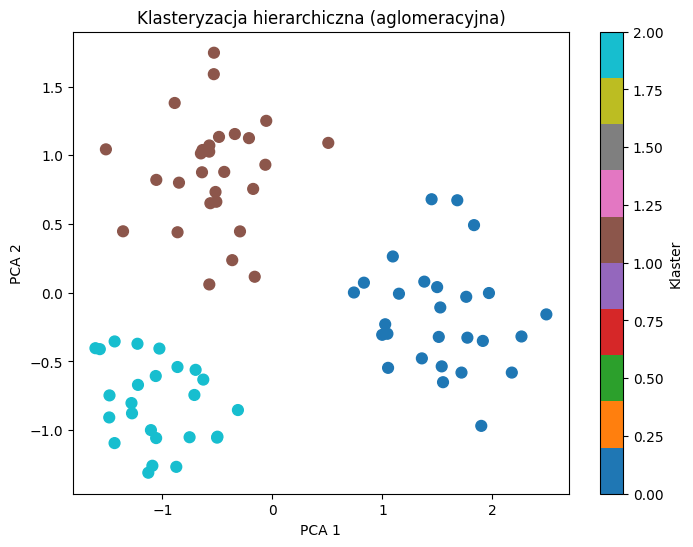

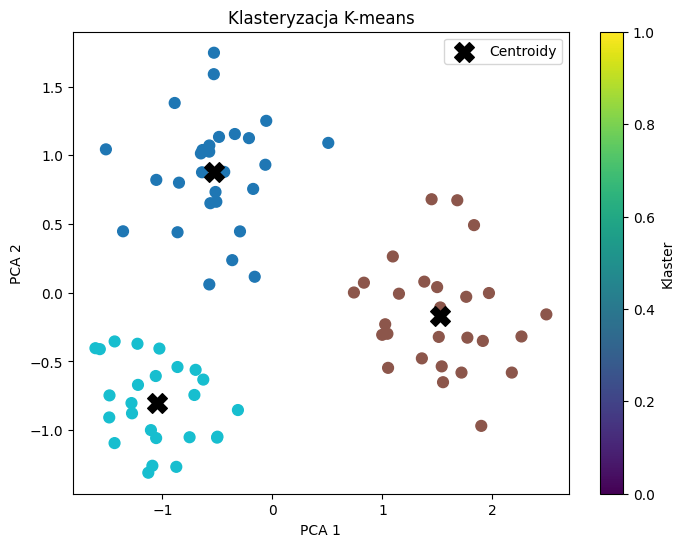

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv("k_means_data.csv")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_agg = agg.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels_agg,
    cmap="tab10",
    s=60
)
plt.title("Klasteryzacja hierarchiczna (aglomeracyjna)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Klaster")
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels_km,
    cmap="tab10",
    s=60
)

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker="X",
    s=200,
    c="black",
    label="Centroidy"
)

plt.title("Klasteryzacja K-means")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.colorbar(label="Klaster")
plt.show()




## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

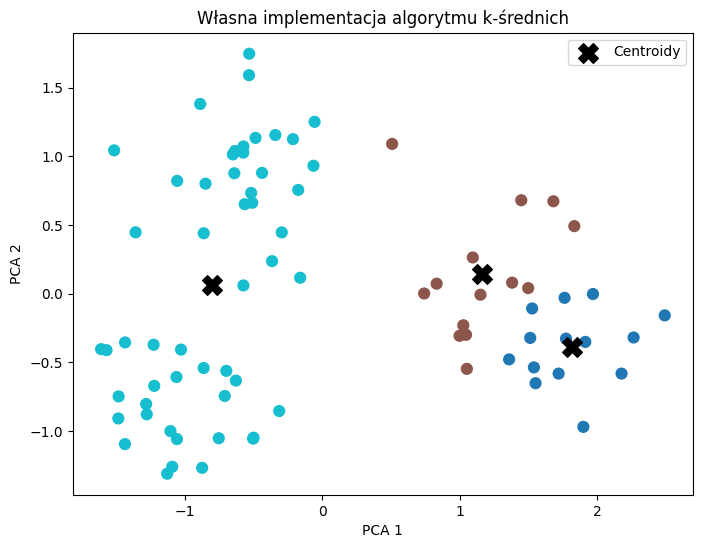

In [39]:
df = pd.read_csv("k_means_data.csv")
X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def k_means_manual(X, k, max_iters=100):
    np.random.seed(42)

    # 1. Losowy wybór centroidów początkowych
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):

        clusters = [[] for _ in range(k)]

        for x in X:
            distances = [euclidean_distance(x, c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(x)

        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroids.append(np.mean(cluster, axis=0))
            else:
                new_centroids.append(centroids[len(new_centroids)])

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    labels = []
    for x in X:
        distances = [euclidean_distance(x, c) for c in centroids]
        labels.append(np.argmin(distances))

    return np.array(labels), centroids


k = 3
labels, centroids = k_means_manual(X_scaled, k)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap="tab10",
    s=60
)

plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker="X",
    s=200,
    c="black",
    label="Centroidy"
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Własna implementacja algorytmu k-średnich")
plt.legend()
plt.show()



## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [40]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()

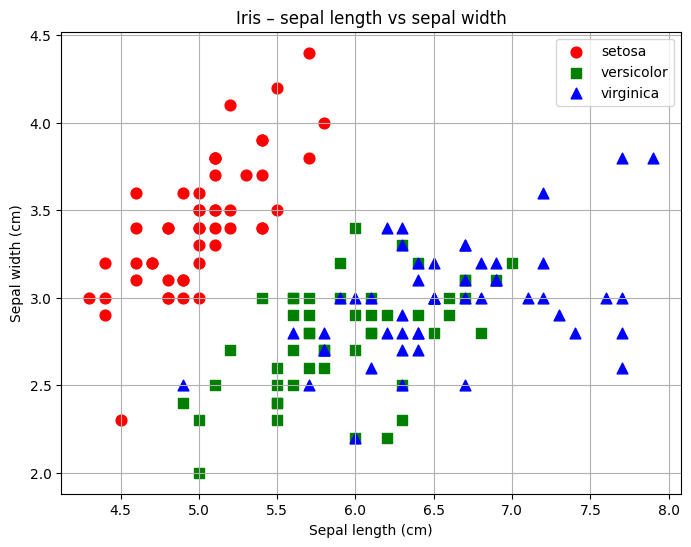

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min            4.300000          2.000000           1.000000          0.100000
max            7.900000          4.400000           6.900000          2.500000
mean           5.843333          3.057333           3.758000          1.199333
std            0.828066          0.435866           1.765298          0.762238
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


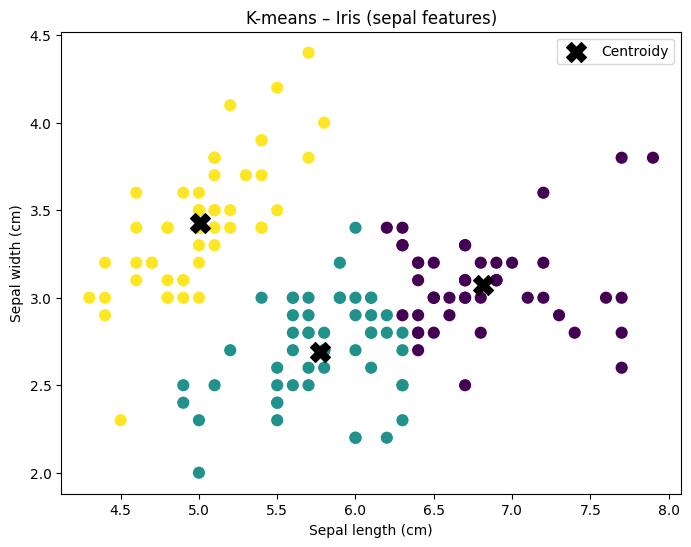

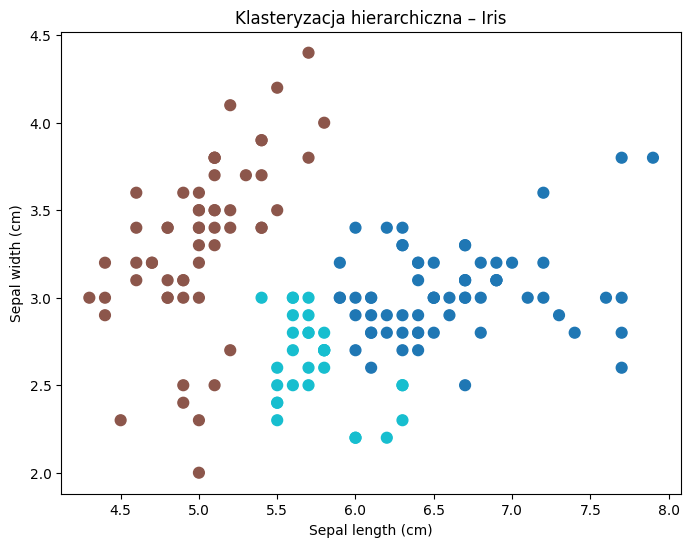

In [46]:
df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)
df["class"] = iris.target
df["class_name"] = [iris.target_names[i] for i in iris.target]

df.head()

markers = ["o", "s", "^"]
colors = ["red", "green", "blue"]

plt.figure(figsize=(8, 6))

for i, class_name in enumerate(iris.target_names):
    subset = df[df["class"] == i]
    plt.scatter(
        subset["sepal length (cm)"],
        subset["sepal width (cm)"],
        color=colors[i],
        marker=markers[i],
        label=class_name,
        s=60
    )

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Iris – sepal length vs sepal width")
plt.legend()
plt.grid(True)
plt.show()

stats = df.iloc[:, :4].agg(["min", "max", "mean", "std"])
print(stats)

correlation_matrix = df.iloc[:, :4].corr()
print(correlation_matrix)

X = df[["sepal length (cm)", "sepal width (cm)"]].values
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels_km,
    cmap="viridis",
    s=60
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="X",
    s=200,
    c="black",
    label="Centroidy"
)

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("K-means – Iris (sepal features)")
plt.legend()
plt.show()


agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_agg = agg.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels_agg,
    cmap="tab10",
    s=60
)

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Klasteryzacja hierarchiczna – Iris")
plt.show()




## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [ ]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")

In [ ]:
df

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Piętro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3.5,7,6,1,25,Tak
B,172,70,12,4.3,5,1,4,12,Nie


In [ ]:
df.loc['A']

,A
Wzrost (cm),190
Waga (kg),88
Staz (lata),3
Zarobki (tys.),3.5
Ocena (pkt.),7
Piętro,6
Dzieci,1
Odleglosc (km),25
Ubezp.,Tak


In [47]:
from google.colab import files
files.upload()

Saving penguins.csv to penguins.csv


{'penguins.csv': b'species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex\nAdelie,Torgersen,39.1,18.7,181,3750,MALE\nAdelie,Torgersen,39.5,17.4,186,3800,FEMALE\nAdelie,Torgersen,40.3,18,195,3250,FEMALE\nAdelie,Torgersen,,,,,\nAdelie,Torgersen,36.7,19.3,193,3450,FEMALE\nAdelie,Torgersen,39.3,20.6,190,3650,MALE\nAdelie,Torgersen,38.9,17.8,181,3625,FEMALE\nAdelie,Torgersen,39.2,19.6,195,4675,MALE\nAdelie,Torgersen,34.1,18.1,193,3475,\nAdelie,Torgersen,42,20.2,190,4250,\nAdelie,Torgersen,37.8,17.1,186,3300,\nAdelie,Torgersen,37.8,17.3,180,3700,\nAdelie,Torgersen,41.1,17.6,182,3200,FEMALE\nAdelie,Torgersen,38.6,21.2,191,3800,MALE\nAdelie,Torgersen,34.6,21.1,198,4400,MALE\nAdelie,Torgersen,36.6,17.8,185,3700,FEMALE\nAdelie,Torgersen,38.7,19,195,3450,FEMALE\nAdelie,Torgersen,42.5,20.7,197,4500,MALE\nAdelie,Torgersen,34.4,18.4,184,3325,FEMALE\nAdelie,Torgersen,46,21.5,194,4200,MALE\nAdelie,Biscoe,37.8,18.3,174,3400,FEMALE\nAdelie,Biscoe,37.7,18.7,180,3600,MALE\nAdelie,Bi

In [50]:
df = pd.read_csv("penguins.csv")
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [52]:
df_clean = df.dropna()


In [53]:
df_clean.isnull().sum()


,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [54]:
X = df_clean[["bill_length_mm", "flipper_length_mm"]]
X.head()


,bill_length_mm,flipper_length_mm
0,39.1,181.0
1,39.5,186.0
2,40.3,195.0
4,36.7,193.0
5,39.3,190.0


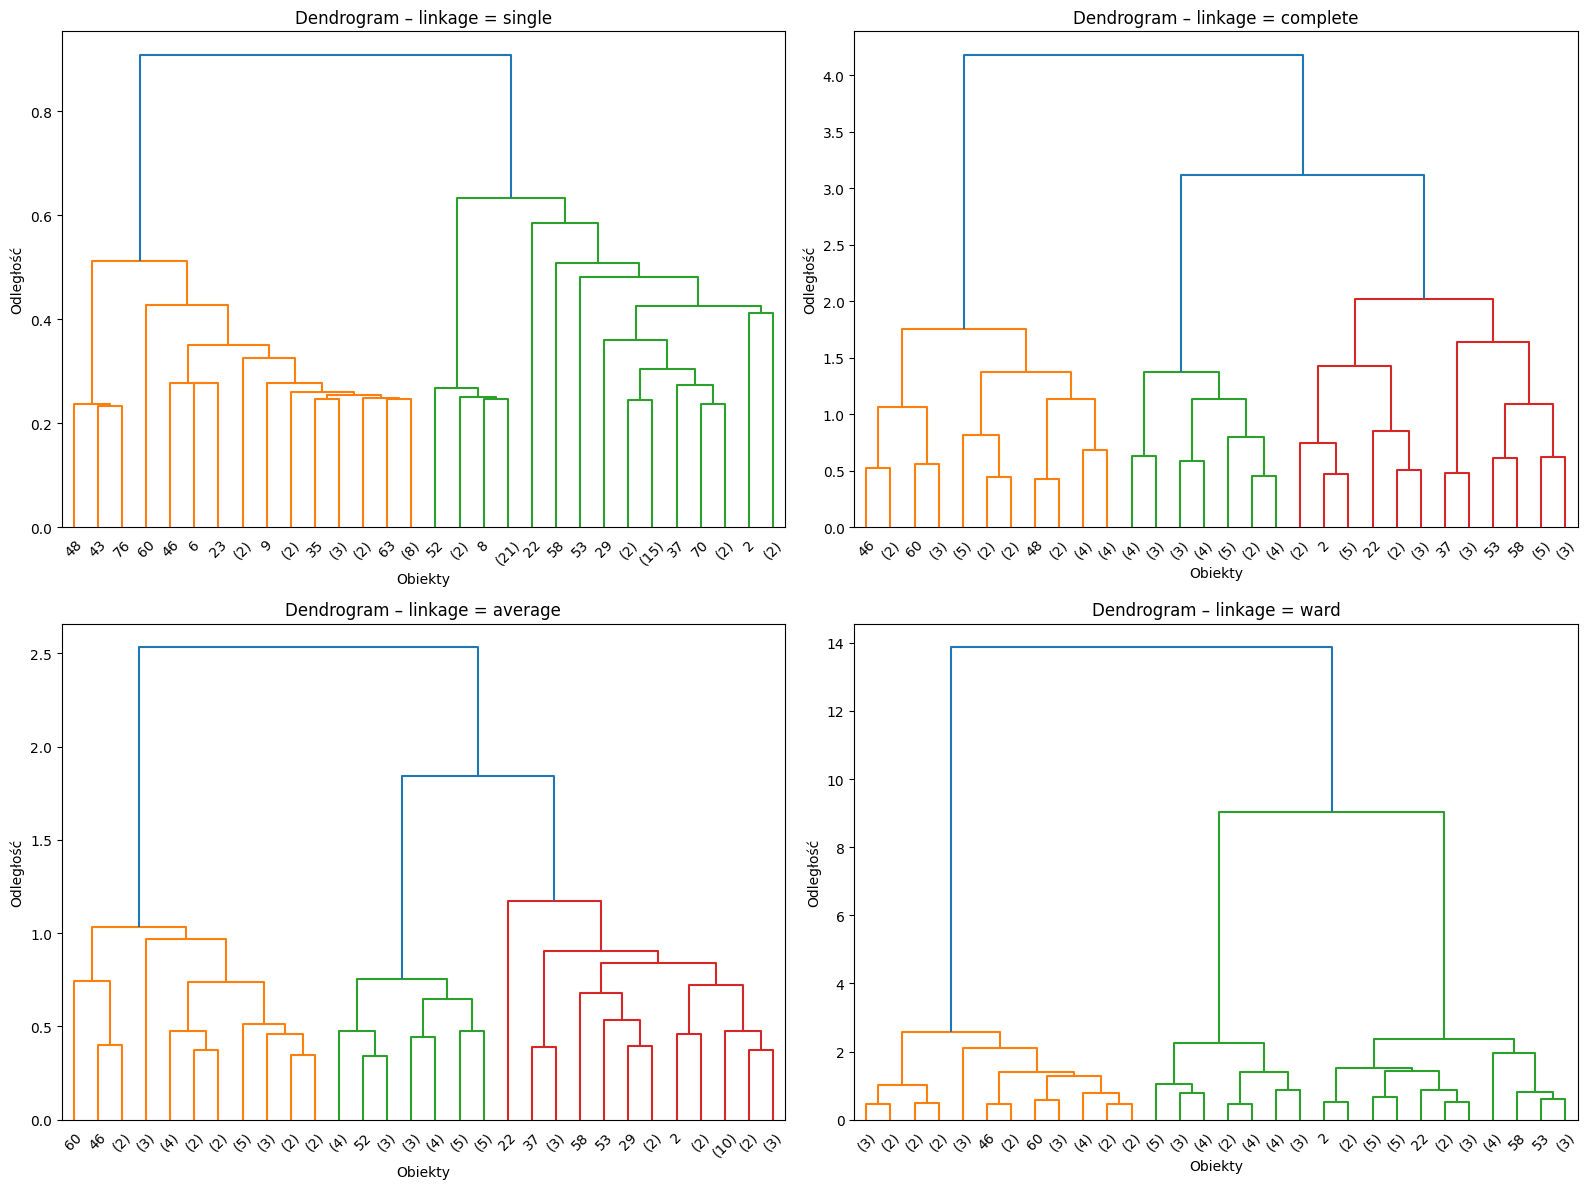

In [55]:
linkage_methods = ["single", "complete", "average", "ward"]

plt.figure(figsize=(16, 12))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(X_scaled, method=method)
    dendrogram(Z, truncate_mode="lastp", p=30)
    plt.title(f"Dendrogram – linkage = {method}")
    plt.xlabel("Obiekty")
    plt.ylabel("Odległość")

plt.tight_layout()
plt.show()


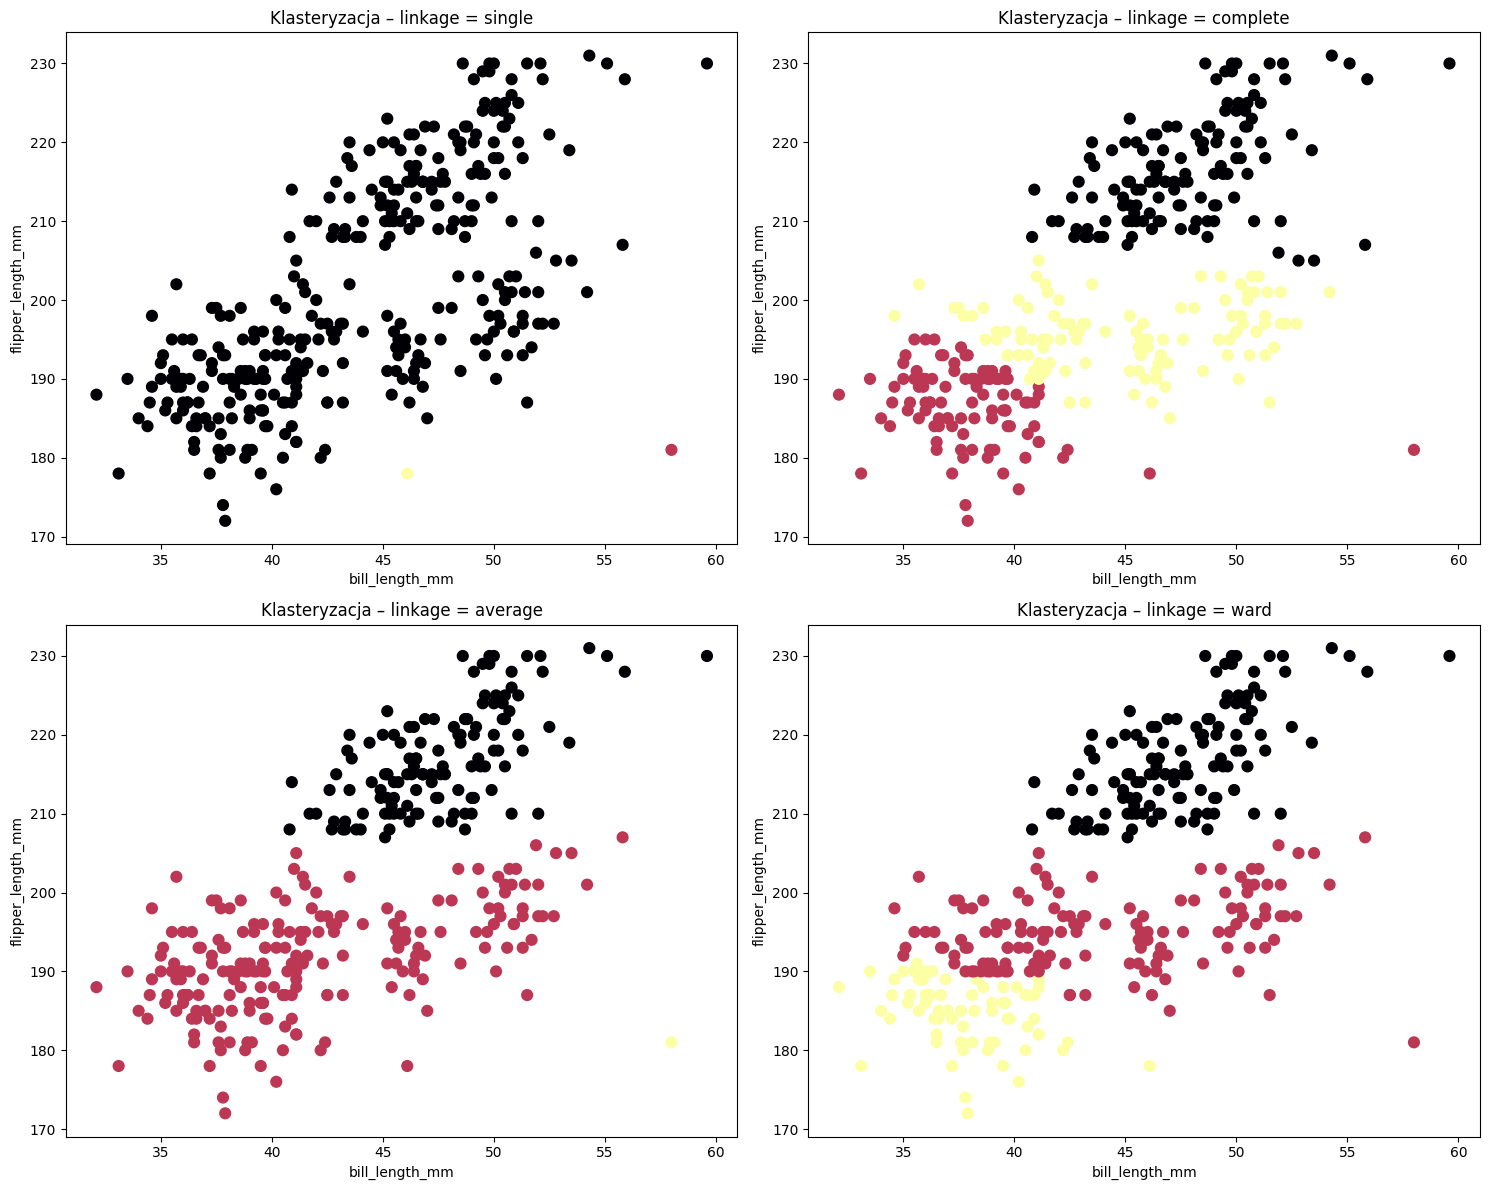

In [61]:
cluster_results = {}

for method in linkage_methods:
    if method == "ward":
        agg = AgglomerativeClustering(n_clusters=3, linkage=method)
    else:
        agg = AgglomerativeClustering(
            n_clusters=3,
            linkage=method,
            metric="euclidean"
        )

    labels = agg.fit_predict(X)
    cluster_results[method] = labels

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, method in enumerate(linkage_methods):
    axes[i].scatter(
        X['bill_length_mm'],
        X['flipper_length_mm'],
        c=cluster_results[method],
        cmap="inferno",
        s=60
    )
    axes[i].set_title(f"Klasteryzacja – linkage = {method}")
    axes[i].set_xlabel("bill_length_mm")
    axes[i].set_ylabel("flipper_length_mm")

plt.tight_layout()
plt.show()
